In [1]:
from DataHandling import *

In [2]:
from GAN import *

#### We only use the Generator to visualize the generated Contour from the input image

In [3]:
cuda = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(cuda)
model = Generator()
model.to(cuda)

cpu


Generator(
  (model): UNet(
    (inc): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Down(
      (maxpool_conv): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): DoubleConv(
          (double_conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), paddi

In [4]:
checkpoint = torch.load('GeneratorXX75.pt', map_location=torch.device('cpu'))
#checkpoint = torch.load('GeneratorXX75.pt')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

#### In the above cell, please uncomment the 2nd line if the code is being run on a GPU.

In [5]:
model.eval()

Generator(
  (model): UNet(
    (inc): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Down(
      (maxpool_conv): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): DoubleConv(
          (double_conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), paddi

#### We use a batch size of 1 as we test the results on the original image size. 

In [6]:
val_dataset = CustomDataset(train_type = 'val', transform = None)
dataloader = DataLoader(val_dataset, batch_size = 1, shuffle = True, num_workers = 0)

Using downloaded and verified file: .\VOCtrainval_11-May-2012.tar
Extracting .\VOCtrainval_11-May-2012.tar to .


#### I have used a batch size of 1 since the testing is done on the original image size and not the ones that the model is trained on. 

In [7]:
def get_iou(model, dataloader, threshold):
    model.eval()
    iou = IoULoss()
    th = nn.Threshold(threshold, 0)
    iou_l = 0.0
    j = nn.Sigmoid()
    count = 0
    for x, _, z in dataloader:
        count += 1
        predx = model(x.to(cuda))
        predx = j(predx)
        plt.figure(figsize=(20,20))
        plt.axis("off")
        plt.subplot(1, 3, 1);plt.imshow(vutils.make_grid((x).detach(), nrow=2, padding = 20).cpu().permute(1, 2, 0)); plt.title("RGB Image")
        plt.subplot(1, 3, 2);plt.imshow(vutils.make_grid((predx).detach(), nrow=2, padding = 20).cpu().permute(1, 2, 0)); plt.title("Generated Contours")
        plt.subplot(1, 3, 3);plt.imshow(vutils.make_grid((z).detach(), nrow=2, padding = 20).cpu().permute(1, 2, 0)); plt.title("Ground-Truth Contours")
        plt.show()
        iou_x = iou(z.cpu(), predx.cpu())
        iou_l += iou_x
        print("IOU = %.4f" %(iou_l / count))
    print("IOU = %.4f" %(iou_l / count))

#### The above function displays the results of the generator along with the RGB Image and the Ground-Truth Contour. It also generates the Intersection over Union between the generated contour and the ground-truth contour. 

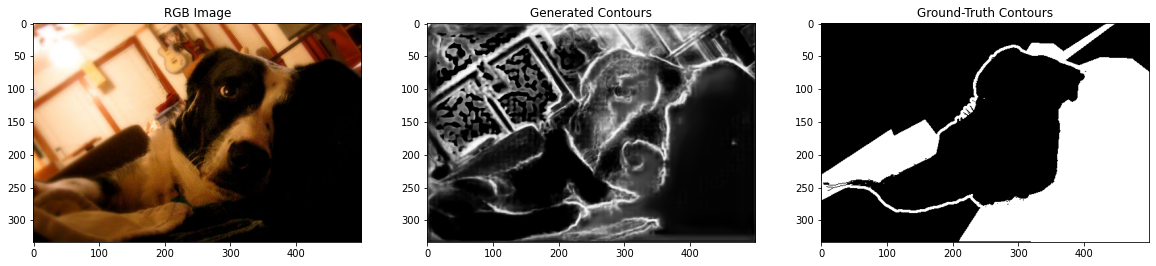

IOU = 0.1242


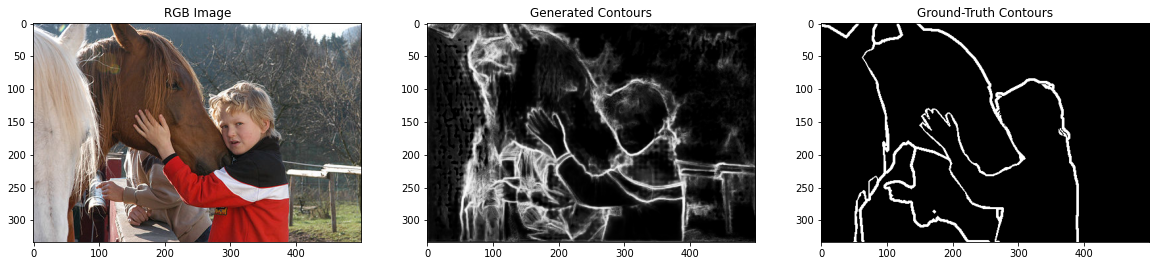

IOU = 0.1434


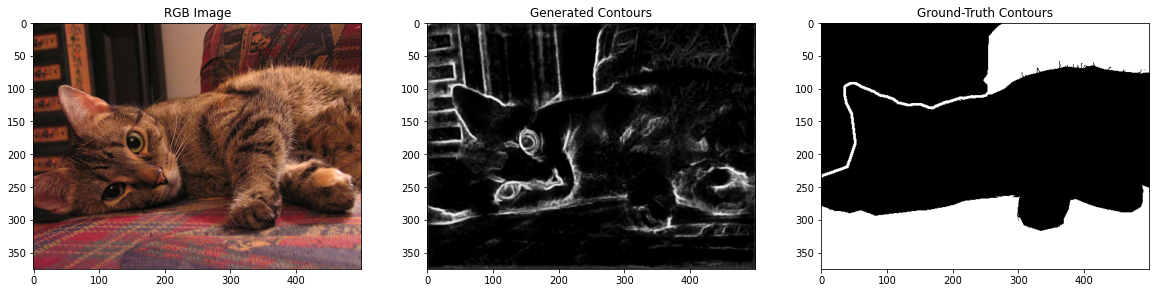

IOU = 0.1186


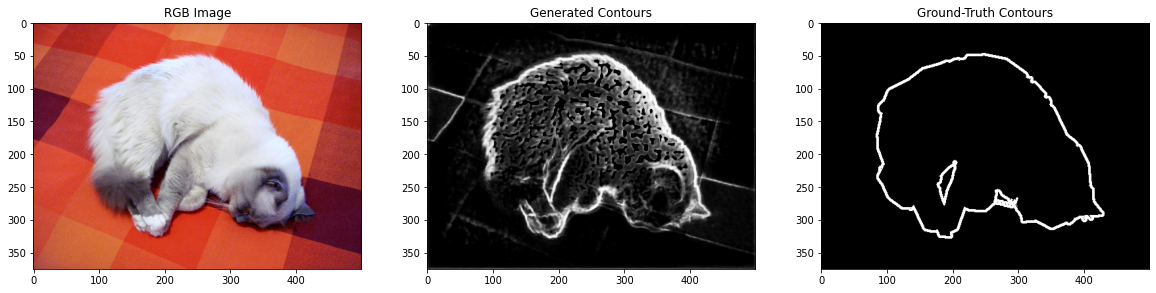

IOU = 0.1186


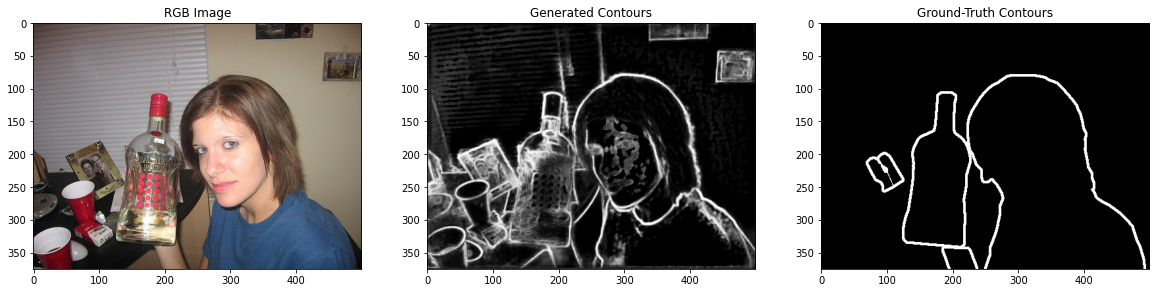

IOU = 0.1202


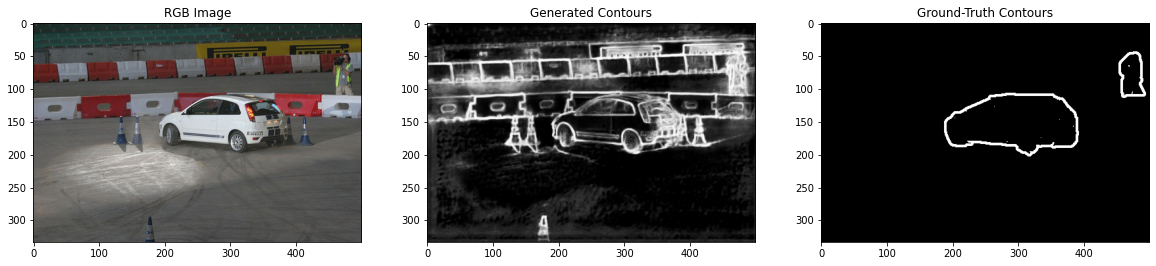

IOU = 0.1065


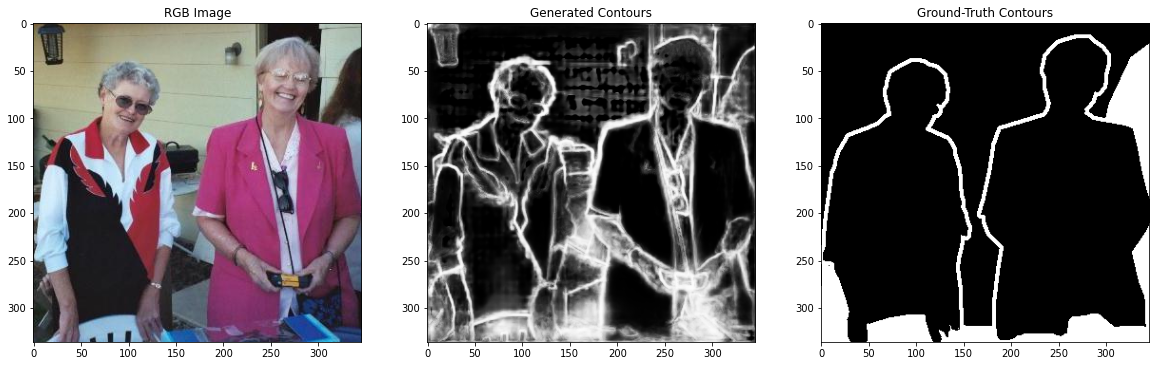

IOU = 0.1263


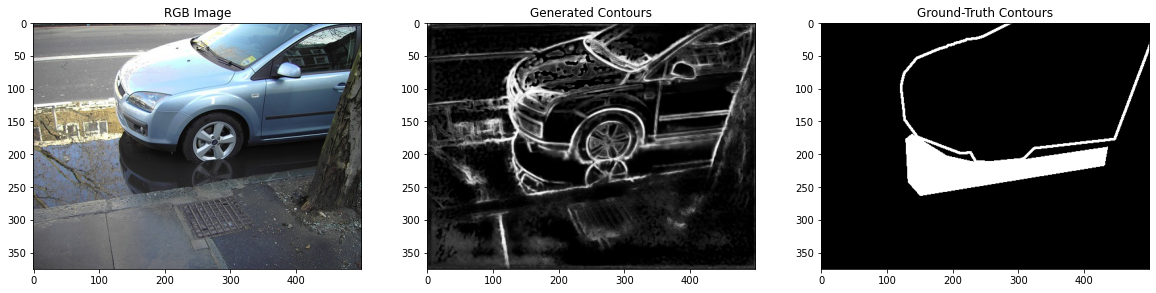

IOU = 0.1217


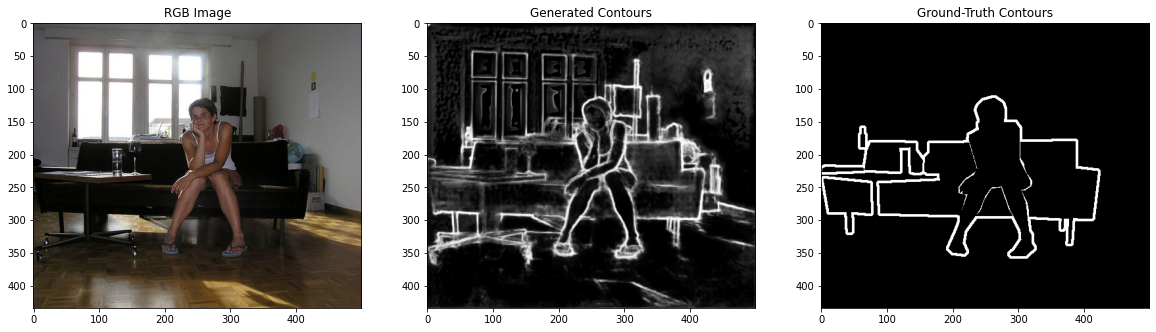

IOU = 0.1222


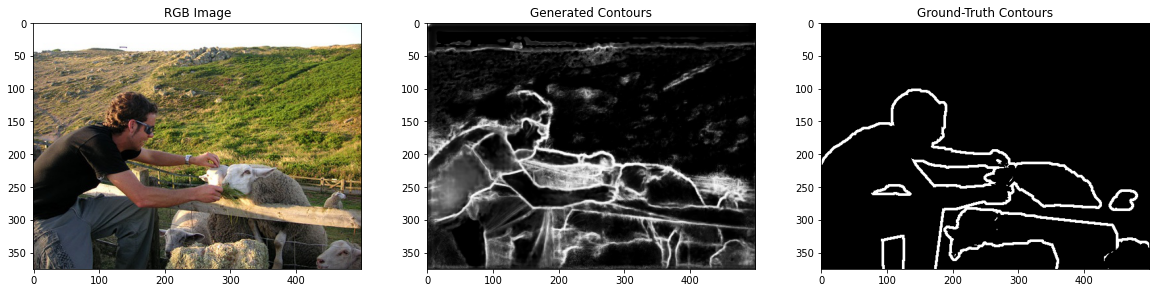

IOU = 0.1243


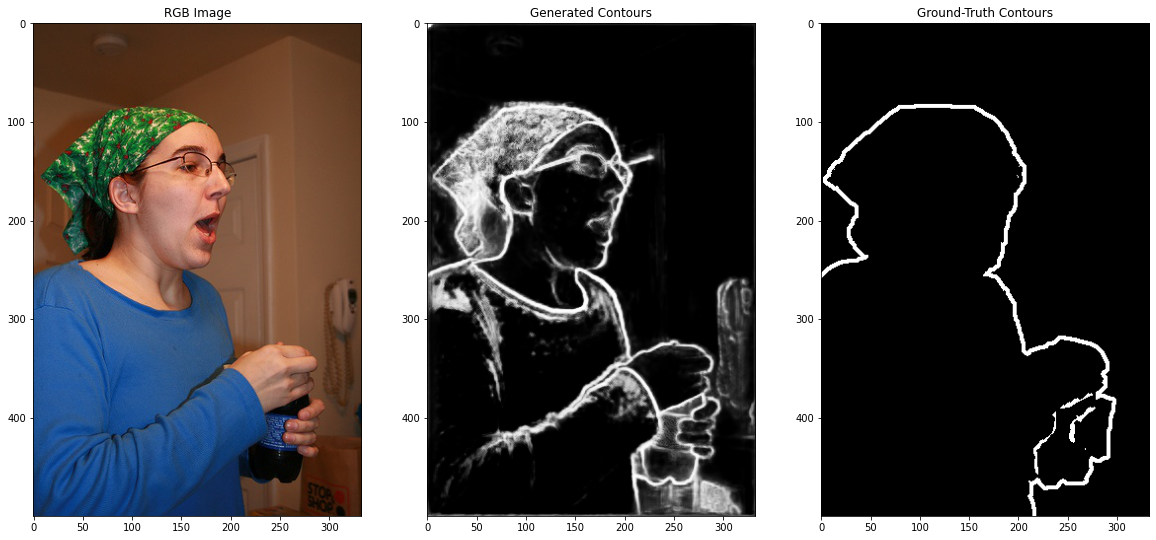

IOU = 0.1214


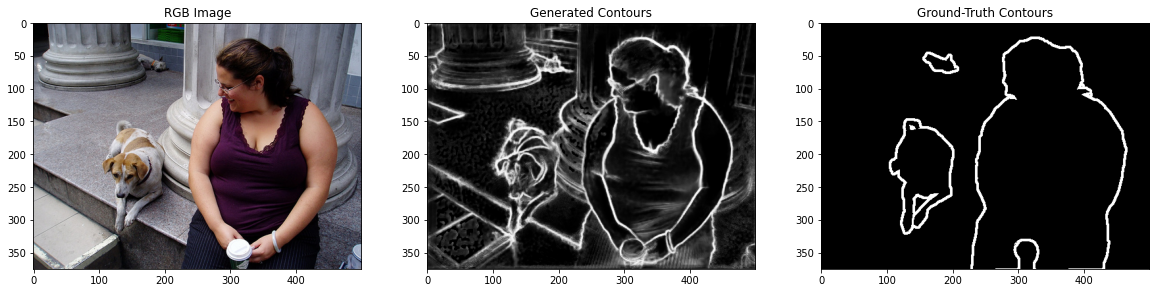

IOU = 0.1221


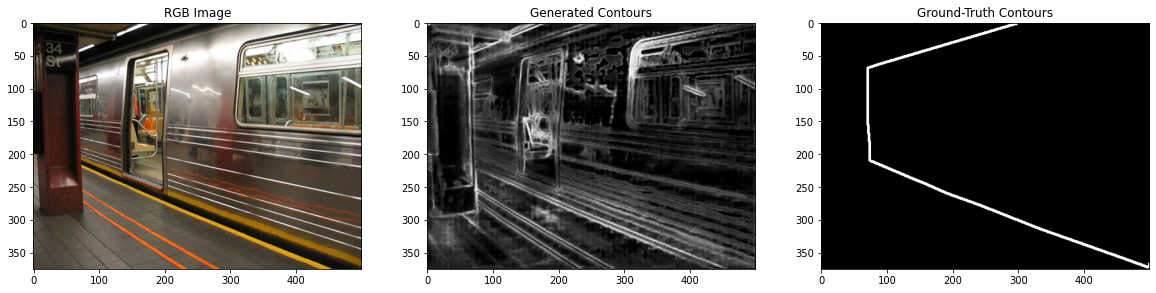

IOU = 0.1149


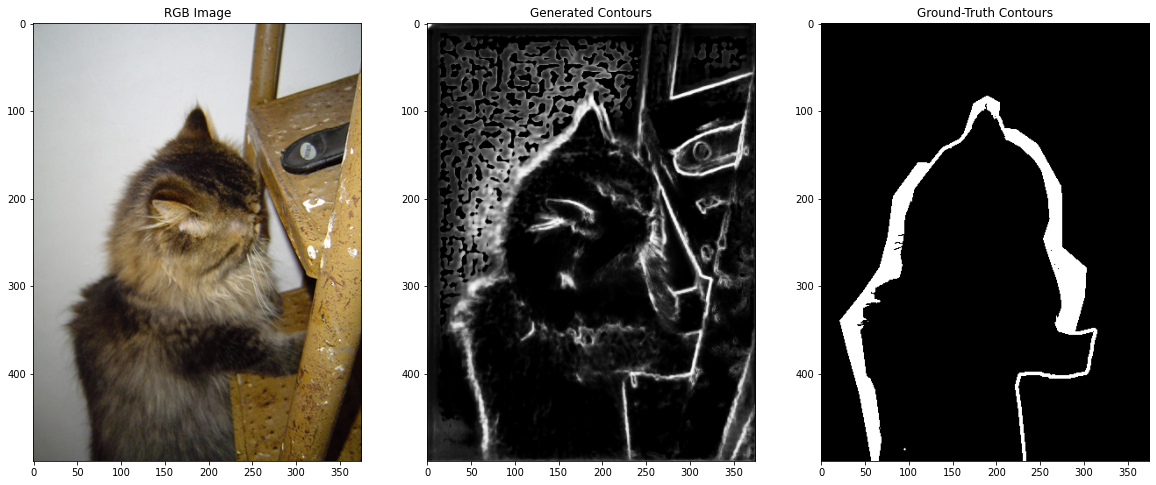

IOU = 0.1168


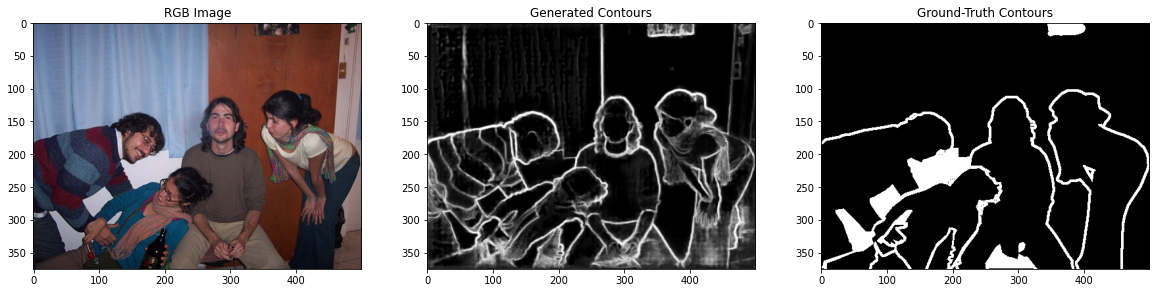

IOU = 0.1237


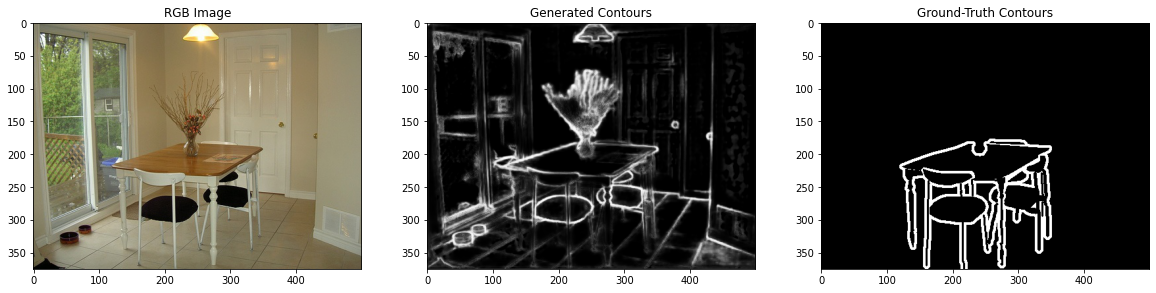

IOU = 0.1227


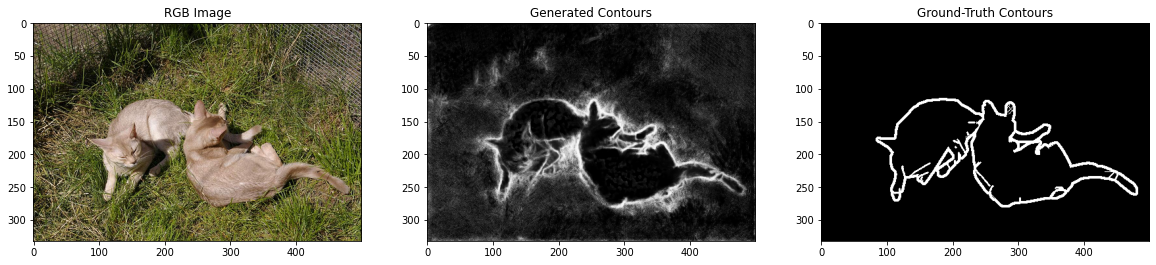

IOU = 0.1248


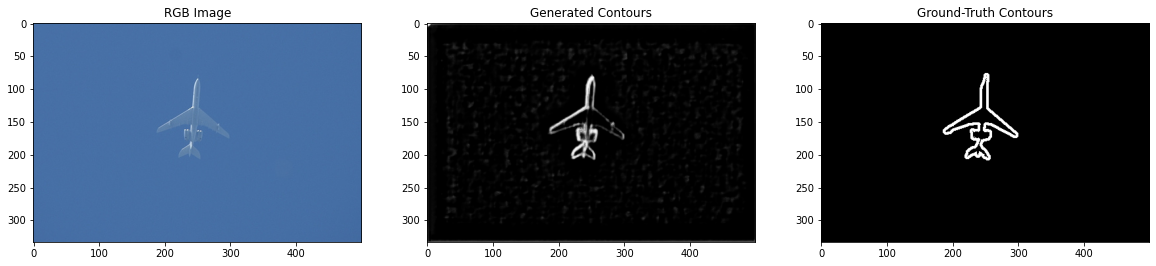

IOU = 0.1289


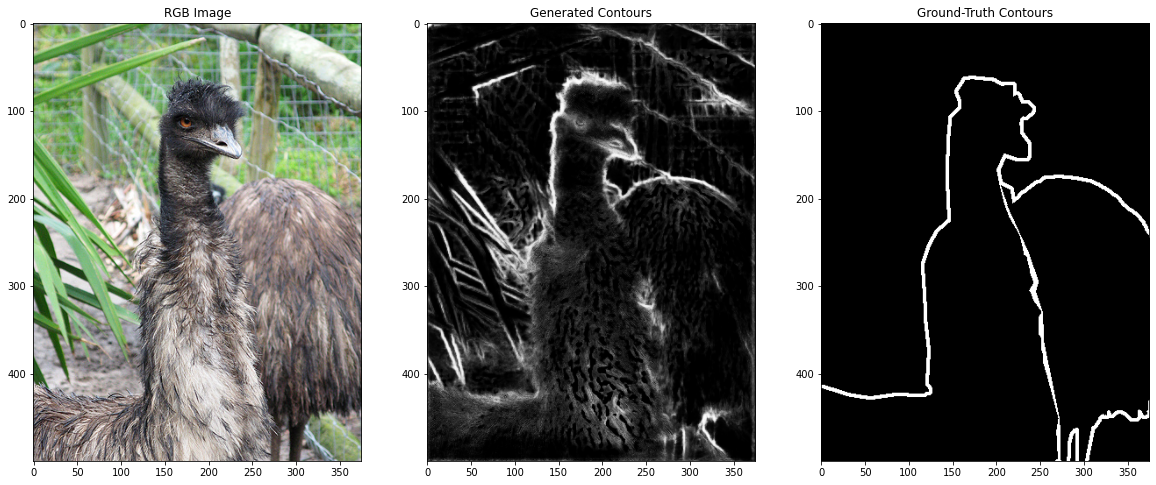

IOU = 0.1272


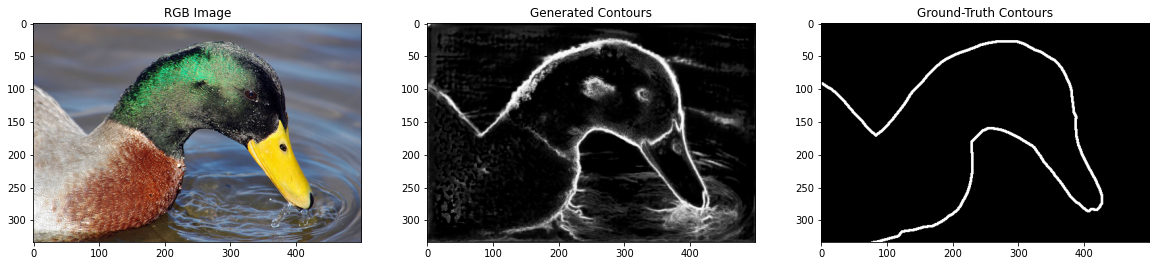

IOU = 0.1300


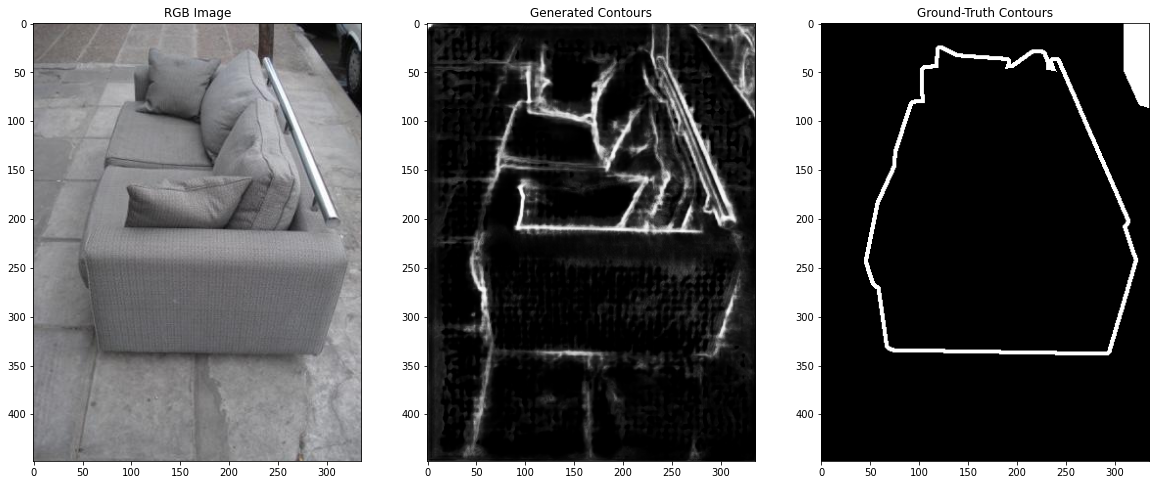

IOU = 0.1301


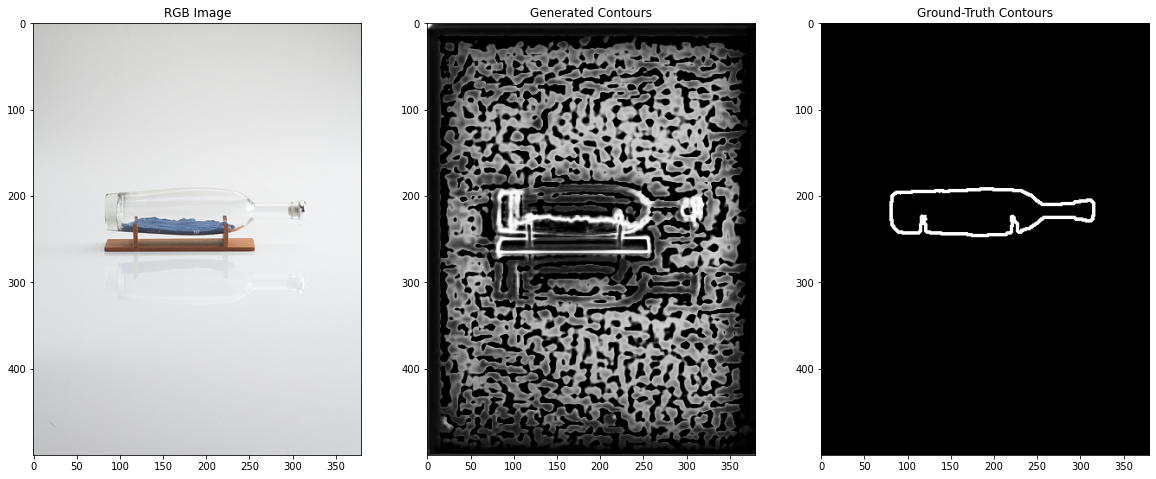

IOU = 0.1253


KeyboardInterrupt: 

In [8]:
with torch.no_grad():
    get_iou(model, dataloader, 0.9)

#### I have only visualized a subset of the validation images. Running the above cell for longer periods of time can give out more results. This is the first such approach to use a Generative Adversarial Network based approach for Contour Detection. Though the results are underwhelming, the project does seem to show promise which can be seen from the results above and also the ones put in the report. 